In [2]:
import pandas as pd

# Read Data

In [3]:
df = pd.read_csv("Customer_Segmentation.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


# Data Preprocessing

## Null Handling

In [4]:
df.fillna(method="ffill",inplace=True)

#### Subset Data

In [5]:
y = df["Segmentation"]
X = df.drop(['ID','Segmentation'],axis=1)

## Encoding

In [6]:
X = pd.get_dummies(X)
X.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,38,1.0,3.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,67,1.0,1.0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,67,0.0,2.0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,40,0.0,6.0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


# Data Split

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Scalling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

# Modelling

## KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled,y_train)

acc_knn_train = knn.score(X_train_scaled,y_train)
acc_knn_test = knn.score(X_test_scaled,y_test)

print("Akurasi Training Set (KNN) : ", round(knn.score(X_train_scaled,y_train),2))
print("Akurasi Test Set (KNN)     : ", round(knn.score(X_test_scaled,y_test),2))

Akurasi Training Set (KNN) :  0.69
Akurasi Test Set (KNN)     :  0.45


## SVM

In [26]:
from sklearn.svm import SVC

In [27]:
svm = SVC(kernel='rbf')

svm.fit(X_train_scaled,y_train)

acc_svm_train = svm.score(X_train_scaled,y_train)
acc_svm_test = svm.score(X_test_scaled,y_test)

print("Akurasi Training Set (SVM) : ", round(svm.score(X_train_scaled,y_train),2))
print("Akurasi Test Set (SVM)     : ", round(svm.score(X_test_scaled,y_test),2))

Akurasi Training Set (SVM) :  0.58
Akurasi Test Set (SVM)     :  0.5


## Bandingkan Algoritma

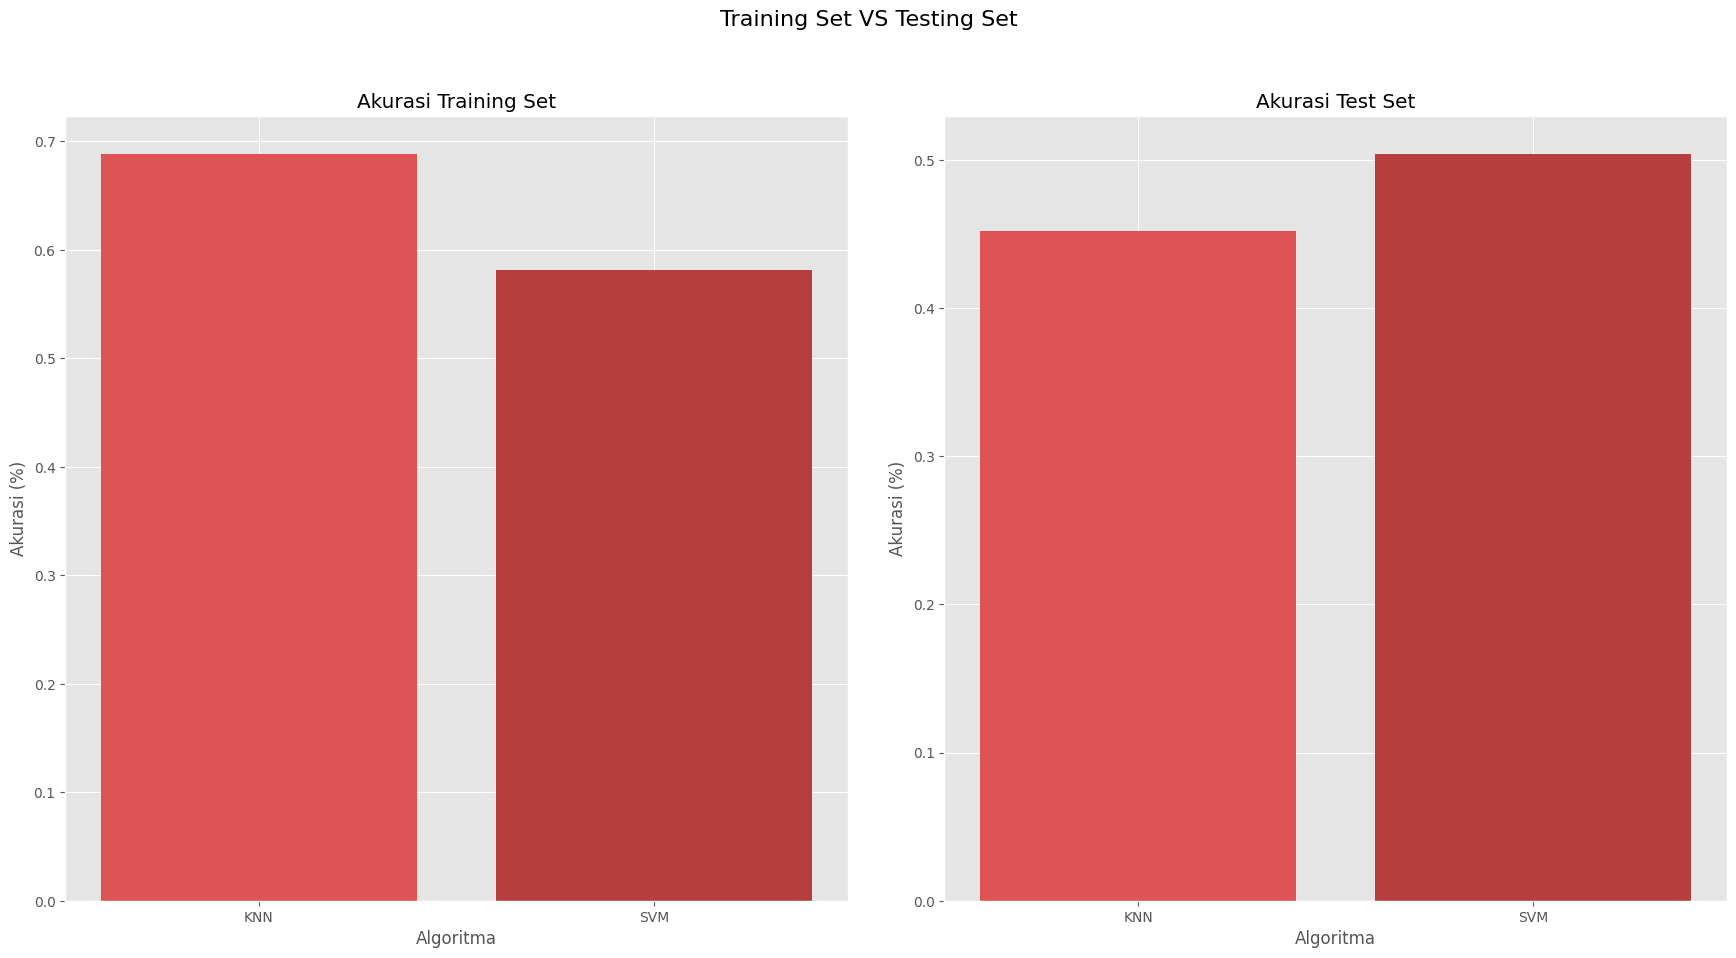

In [68]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

label = ["KNN","SVM"]
train_acc = [acc_knn_train,acc_svm_train]
test_acc = [acc_knn_test,acc_svm_test]

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,10))


ax[0].bar(label,train_acc,color=['#DD5353','#B73E3E'])
ax[0].set_ylabel("Akurasi (%)")
ax[0].set_xlabel("Algoritma")
ax[0].set_title("Akurasi Training Set")

ax[1].bar(label,test_acc,color=['#DD5353','#B73E3E'])
ax[1].set_ylabel("Akurasi (%)")
ax[1].set_xlabel("Algoritma")
ax[1].set_title("Akurasi Test Set")

fig.suptitle('Training Set VS Testing Set', fontsize=16)
fig.tight_layout(pad=3.0)
plt.show()